In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qdatoolkit as qda

data = pd.read_csv('./data/layer_324.csv')

data.head()

,t,x,y,z,layer_id,sensor0,sensor1,temp,track_id,track_orient,pos_rel,t_rel
0,1.2730e+08,26.035,-66.386,12.96,324,800.0,795.0,1594.7,0,131,0.0000,0.0
1,1.2730e+08,26.043,-66.392,12.96,324,798.0,794.0,1593.3,0,131,0.0082,10.0
2,1.2730e+08,26.047,-66.398,12.96,324,814.0,799.0,1608.5,0,131,0.0164,20.0
3,1.2730e+08,26.049,-66.404,12.96,324,829.0,806.0,1619.4,0,131,0.0246,30.0
4,1.2730e+08,26.057,-66.412,12.96,324,833.0,824.0,1599.8,0,131,0.0328,40.0


Runs test statistic = -227.133
Runs test p-value = 0.000



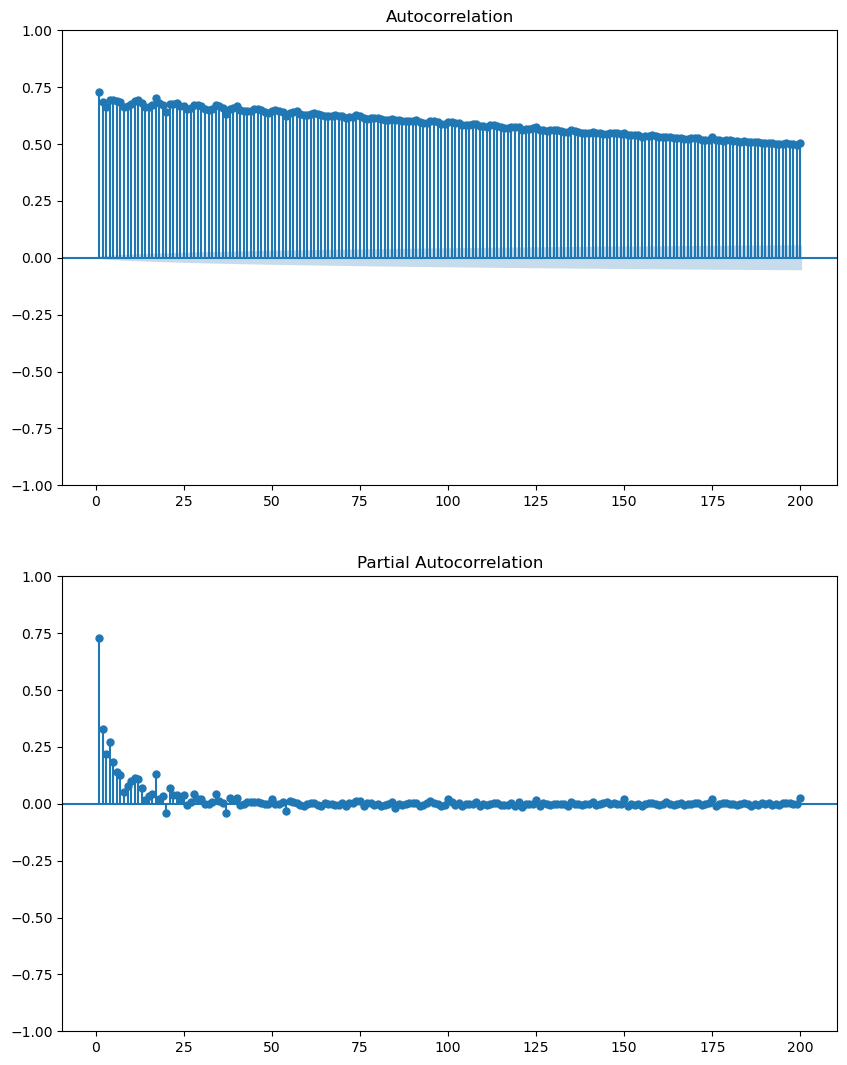

(-227.13295162929526, 0.0)


In [3]:

# Perform the runs test for independence on the 'temp' column
result = qda.Assumptions(data['temp']).independence()

# Display the result
print(result)

In [ ]:
data1 = data.sample(n=5000, random_state=42)  # Randomly sample 5000 rows
data1.reset_index(drop=True, inplace=True)
data1.head()

KeyError: 'value'

Runs test statistic = 0.214
Runs test p-value = 0.831



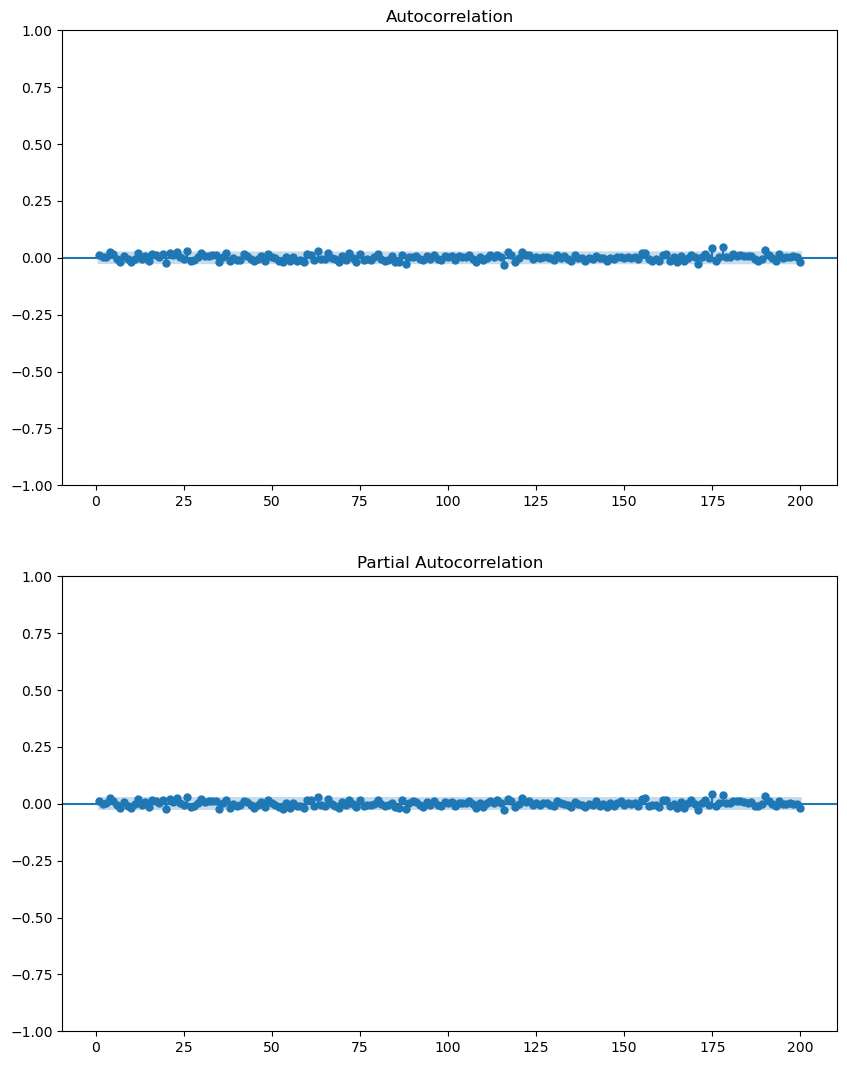

In [62]:
_=qda.Assumptions(data1['temp']).independence()

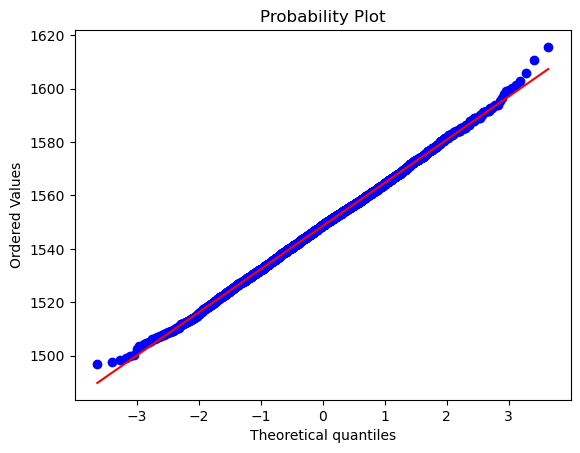

Shapiro-wilk test statistic = 0.999
Shapiro-wilk test p-value = 0.181


In [63]:
_=qda.Assumptions(data1['temp']).normality()

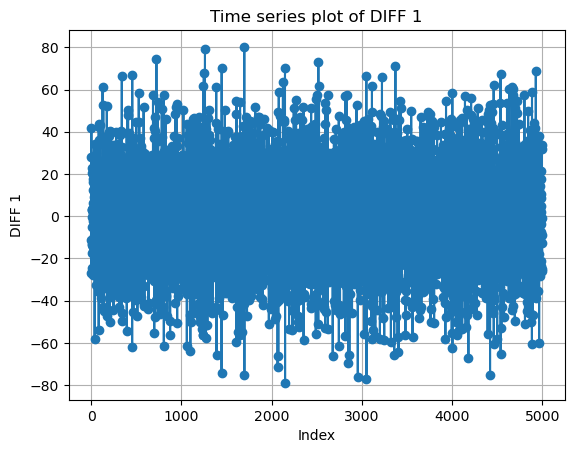

In [64]:
data1['diff1'] = data1['temp'].diff(1)

plt.plot(data1['diff1'], 'o-')
plt.xlabel('Index')
plt.ylabel('DIFF 1')
plt.title('Time series plot of DIFF 1')
plt.grid()
plt.show()

Runs test statistic = 23.591
Runs test p-value = 0.000



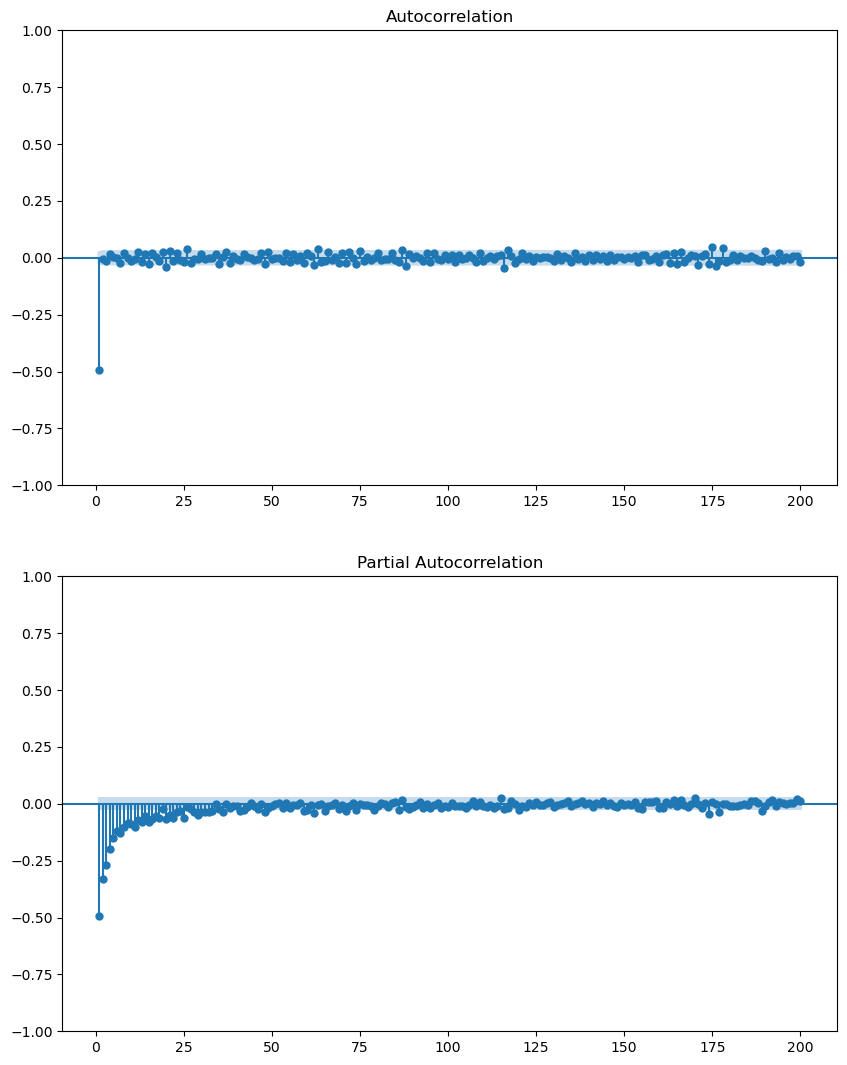

In [65]:
_ = qda.Assumptions(data1['diff1']).independence()

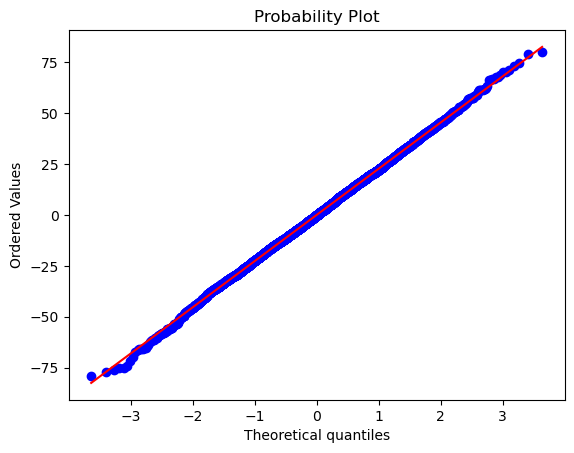

Shapiro-wilk test statistic = 1.000
Shapiro-wilk test p-value = 0.635


In [66]:
_ = qda.Assumptions(data1['diff1']).normality()

In [67]:
# fit model ARIMA with constant term
model1 = qda.ARIMA(data1['temp'], order=(0,1,1), add_constant=True)

qda.ARIMAsummary(model1)

---------------------
ARIMA MODEL RESULTS
---------------------
ARIMA model order: p=0, d=1, q=1

FINAL ESTIMATES OF PARAMETERS
-------------------------------
 Term        Coef  SE Coef  T-Value  P-Value
const  9.0155e-06   0.0002   0.0569   0.9546
ma.L1 -9.9997e-01   0.0133 -75.3523   0.0000

RESIDUAL SUM OF SQUARES
-------------------------
    DF         SS       MS
4997.0 1.3073e+06 261.6238

Ljung-Box Chi-Square Statistics
----------------------------------
 Lag  Chi-Square  P-Value
  12     11.9077   0.4531
  24     25.7889   0.3640
  36     37.7737   0.3882
  48     46.1397   0.5494


In [46]:
# fit model ARIMA with constant term
model2 = qda.ARIMA(data1['temp'], order=(0,1,1), add_constant=False)

qda.ARIMAsummary(model2)

---------------------
ARIMA MODEL RESULTS
---------------------
ARIMA model order: p=0, d=1, q=1

FINAL ESTIMATES OF PARAMETERS
-------------------------------
 Term    Coef  SE Coef   T-Value  P-Value
ma.L1 -0.9998   0.0023 -432.0001      0.0

RESIDUAL SUM OF SQUARES
-------------------------
    DF         SS       MS
4998.0 1.3074e+06 261.5754

Ljung-Box Chi-Square Statistics
----------------------------------
 Lag  Chi-Square  P-Value
  12     11.9029   0.4535
  24     25.7729   0.3648
  36     37.7500   0.3892
  48     46.1200   0.5502


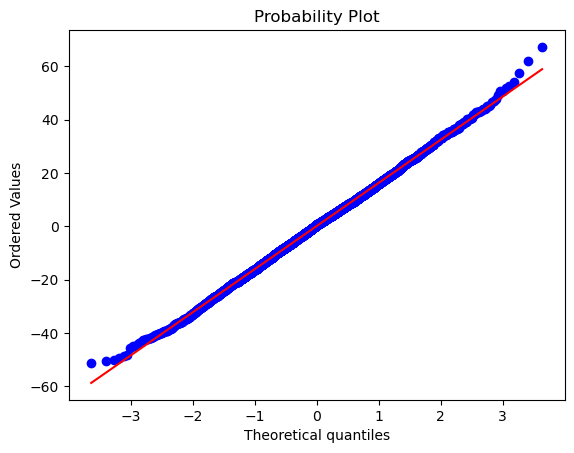

Shapiro-wilk test statistic = 0.999
Shapiro-wilk test p-value = 0.178


In [55]:
#extract the residuals
residuals = model2.resid[1:] 

# Perform the Shapiro-Wilk test
_ = qda.Assumptions(residuals).normality()

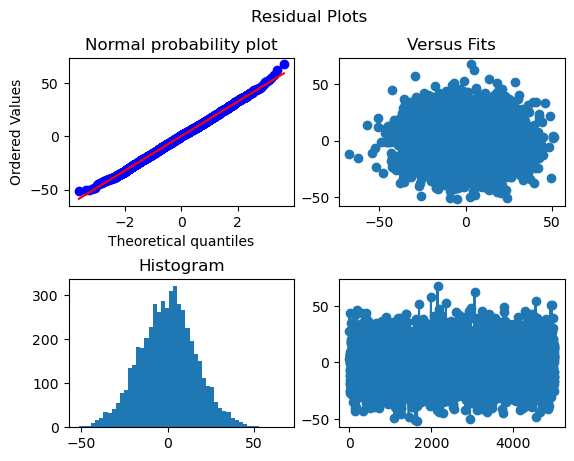

In [56]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model2.fittedvalues[1:], model2.resid[1:])
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals, bins=50)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()

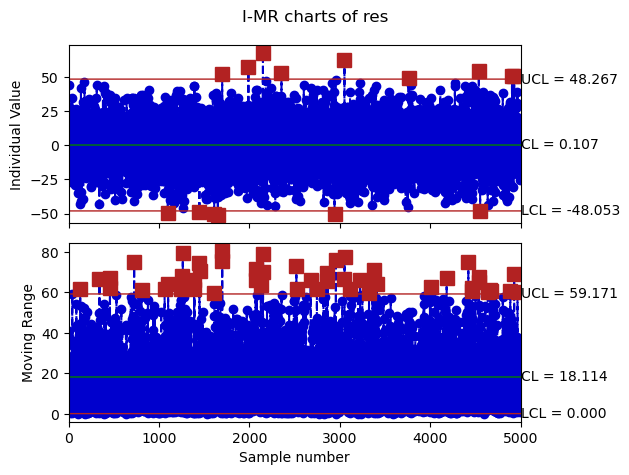

In [57]:
# Put the residuals in a dataframe
df_SCC = pd.DataFrame(model2.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res')

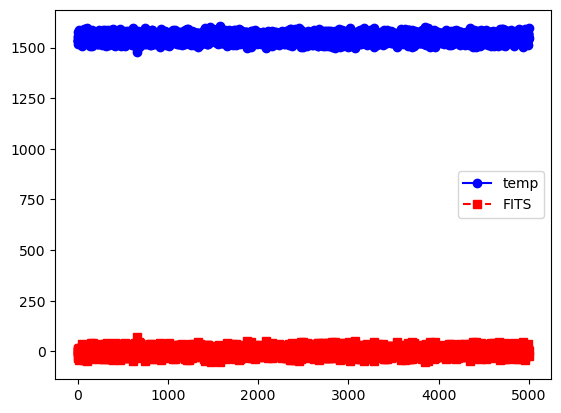

In [50]:
plt.plot(data1['temp'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(model2.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

In [61]:
data2 = model.fittedvalues

data2.head()

0       NaN
1    0.0000
2    4.1778
3    1.6235
4    7.2444
dtype: float64